In [2]:
cd HopSkipDrive/

/Users/allen/HopSkipDrive


/Users/allen/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

## Read Data

In [9]:
ls data/

boost_df.csv


In [12]:
data = pd.read_csv("data/boost_df.csv")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21861 entries, 0 to 21860
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   trip_id                                  21861 non-null  int64  
 1   cumulative_boost_amount_cents            21861 non-null  float64
 2   boost_timestamp                          11861 non-null  object 
 3   manual_boost                             21861 non-null  int64  
 4   boost_ind                                21861 non-null  int64  
 5   seq_boost_count                          21861 non-null  int64  
 6   single_boost_amount_cents                21861 non-null  float64
 7   trip_state                               21861 non-null  object 
 8   created_at                               21861 non-null  object 
 9   claimed_at                               21861 non-null  object 
 10  scheduled_starts_at                      21861

In [32]:
date_cols = ['boost_timestamp','created_at','claimed_at','scheduled_starts_at','scheduled_ends_at',
             'unclaimed_at','trip_completed_at']
data[date_cols] = data[date_cols].apply(pd.to_datetime, errors='coerce')

In [24]:
data.head()

,trip_id,cumulative_boost_amount_cents,boost_timestamp,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,trip_state,created_at,claimed_at,scheduled_starts_at,scheduled_ends_at,unclaimed_at,trip_completed_at,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,origin_metro_area_name,commute_minutes,commute_distance,is_same_day_ride,trip_starts_during_peak_hours,ever_unclaimed
0,43,0.0,NaN,0,0,0,0.0,complete,2023-06-01 17:20:28,2024-04-29 02:39:17,2024-05-17 22:25:00,2024-05-17 23:34:26,NaN,2024-05-17 23:30:55,48.60,24.88,24.88,34.43,Orlando Metro,35.78,4.88,False,True,0
1,58,492.1,2024-05-29 14:10:23,1,1,1,492.1,complete,2023-06-05 15:37:22,2024-05-29 14:40:50,2024-05-29 15:29:10,2024-05-29 16:10:00,2024-05-29 14:06:11,2024-05-29 16:10:33,28.58,19.19,19.19,34.73,Greensboro Metro,29.92,8.90,False,True,1
2,58,877.1,2024-05-29 14:37:26,1,1,2,385.0,complete,2023-06-05 15:37:22,2024-05-29 14:40:50,2024-05-29 15:29:10,2024-05-29 16:10:00,2024-05-29 14:06:11,2024-05-29 16:10:33,28.58,19.19,19.19,34.73,Greensboro Metro,29.92,8.90,False,True,1
3,62,588.0,2024-06-11 14:10:06,1,1,1,588.0,complete,2023-06-05 15:37:22,2024-06-11 14:15:20,2024-06-11 15:01:05,2024-06-11 15:40:00,2024-06-11 14:06:10,2024-06-11 15:47:50,27.24,19.19,19.19,31.37,Greensboro Metro,14.50,2.04,False,True,1
4,72,0.0,NaN,0,0,0,0.0,complete,2023-06-05 15:37:43,2024-05-28 17:37:30,2024-05-28 21:45:00,2024-05-28 22:29:17,2024-05-28 07:46:48,2024-05-28 22:29:06,31.00,19.40,19.40,32.83,Greensboro Metro,32.41,20.50,False,True,1


In [16]:
data.describe()

,trip_id,cumulative_boost_amount_cents,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,commute_minutes,commute_distance,ever_unclaimed
count,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21861.000000,21855.000000,21861.000000
mean,203854.836604,725.042939,0.539683,0.542564,0.837656,421.720781,21.134168,7.937229,8.403571,26.780072,16.030602,6.089528,0.470564
std,109169.472359,921.678022,0.498434,0.498196,0.992350,632.385825,10.450587,6.545183,7.000382,12.055880,12.133978,5.840297,0.499144
min,43.000000,0.000000,0.000000,0.000000,0.000000,-506.100000,4.020000,0.000000,0.220000,7.700000,-18.790000,0.000000,0.000000
25%,114079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.200000,3.540000,3.780000,16.970000,7.820000,1.950000,0.000000
50%,208911.000000,140.000000,1.000000,1.000000,1.000000,140.000000,19.120000,6.160000,6.550000,25.690000,13.850000,4.490000,0.000000
75%,294258.000000,1402.100000,1.000000,1.000000,1.000000,490.000000,25.540000,10.520000,11.160000,34.300000,21.630000,8.660000,1.000000
max,383347.000000,5684.000000,1.000000,1.000000,11.000000,3878.000000,123.500000,76.210000,76.210000,121.340000,513.050000,233.820000,1.000000


<Axes: >

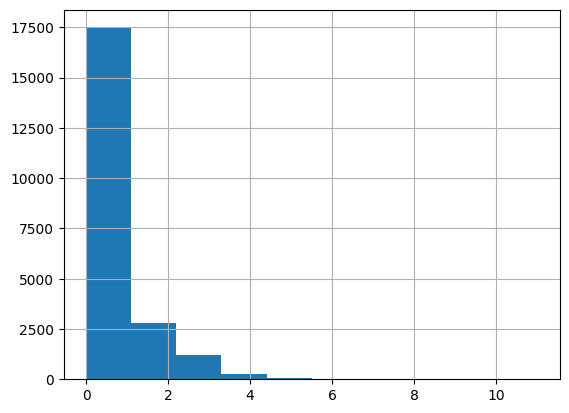

In [15]:
data['seq_boost_count'].hist()

In [17]:
data[data['seq_boost_count']>=11]

,trip_id,cumulative_boost_amount_cents,boost_timestamp,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,trip_state,created_at,claimed_at,...,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,origin_metro_area_name,commute_minutes,commute_distance,is_same_day_ride,trip_starts_during_peak_hours,ever_unclaimed
15808,283316,3122.0,2024-07-17 13:58:07,1,1,11,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,...,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1


In [92]:
data['manual_boost'].value_counts()

manual_boost
1    11798
0    10063
Name: count, dtype: int64

In [94]:
# majority of boosts are manual? not automated?
pd.crosstab(index=data['manual_boost'], columns=data['seq_boost_count'])

seq_boost_count,0,1,2,3,4,5,6,7,8,9,10,11
manual_boost,,,,,,,,,,,,
0,10000,29,30,4,0,0,0,0,0,0,0,0
1,0,7471,2755,1200,272,76,16,4,1,1,1,1


In [115]:
data[data.trip_id==283316]

,trip_id,cumulative_boost_amount_cents,boost_timestamp,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,trip_state,created_at,claimed_at,scheduled_starts_at,scheduled_ends_at,unclaimed_at,trip_completed_at,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,origin_metro_area_name,commute_minutes,commute_distance,is_same_day_ride,trip_starts_during_peak_hours,ever_unclaimed,time_unclaimed_b4_start,base_cost,final_boost_dollars,time_unclaimed_hours,time_to_claim,boost_hour,time_to_claim_days,pct_boost_cost
15798,283316,1022.0,2024-07-17 11:16:07,1,1,1,1022.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104
15799,283316,1162.0,2024-07-17 11:26:06,1,1,2,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104
15800,283316,1302.0,2024-07-17 11:36:09,1,1,3,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104
15801,283316,1442.0,2024-07-17 11:54:07,1,1,4,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104
15802,283316,1582.0,2024-07-17 12:04:10,1,1,5,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104
15803,283316,1722.0,2024-07-17 12:28:06,1,1,6,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104
15804,283316,2562.0,2024-07-17 12:50:05,1,1,7,840.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104
15805,283316,2702.0,2024-07-17 12:58:06,1,1,8,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104
15806,283316,2842.0,2024-07-17 13:18:06,1,1,9,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,13,43.831863,0.636104
15807,283316,2982.0,2024-07-17 13:28:06,1,1,10,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,13,43.831863,0.636104


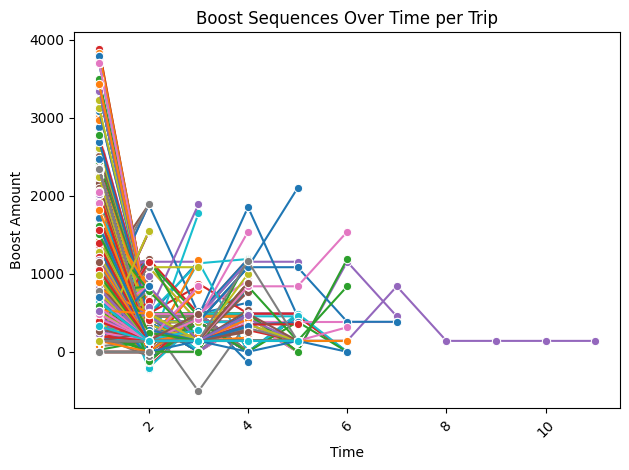

In [89]:
# Plot one line per ride for rides which had boosts
# boosts are decreasing as closer to ride time to try to get rides to fill faster
sns.lineplot(data=data[data['seq_boost_count']>0], x='seq_boost_count', y='single_boost_amount_cents', hue='trip_id', marker='o', palette='tab10', legend=False)

plt.title("Boost Sequences Over Time per Trip")
plt.xlabel("Time")
plt.ylabel("Boost Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='single_boost_amount_cents', ylabel='Count'>

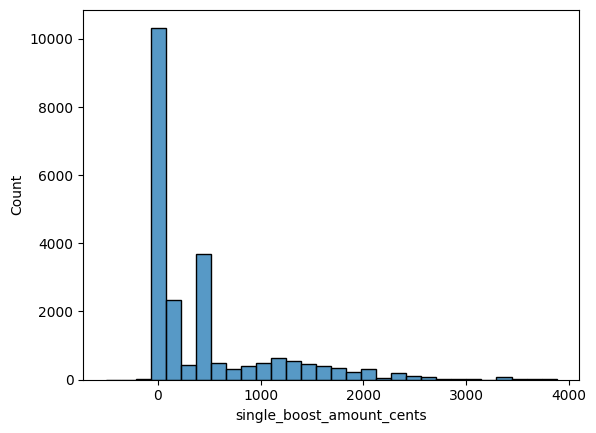

In [96]:
sns.histplot(data['single_boost_amount_cents'], bins=30)

<Axes: xlabel='boost_hour', ylabel='count'>

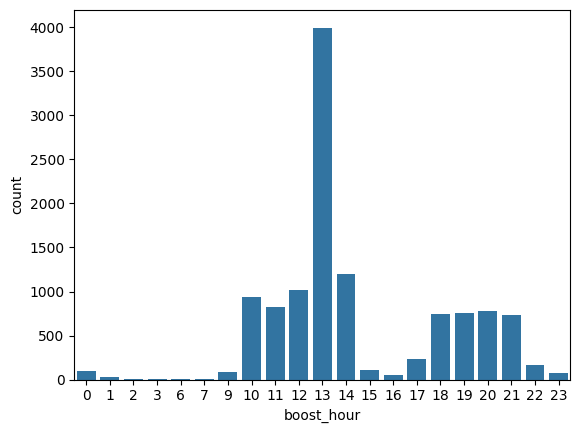

In [142]:
# boosts usually occur in morning/afternoon and during rush hour
data['boost_hour'] = pd.to_datetime(data['boost_timestamp']).dt.hour
data['boost_hour'] = data['boost_hour'].astype('Int64')
# Create a new column for weekday numbers (0=Monday, 6=Sunday)
data['boost_day_weekday'] = pd.to_datetime(data['boost_timestamp']).dt.dayofweek
# Create a categorical column for the days of the week, ensuring they are sorted by the weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['boost_day'] = pd.to_datetime(data['boost_timestamp']).dt.day_name()
data['boost_day'] = pd.Categorical(data['boost_day'], categories=day_order, ordered=True)

data['boost_day'] = pd.to_datetime(data['boost_timestamp']).dt.day_name()
sns.countplot(x='boost_hour', data=data)

In [19]:
data['trip_state'].value_counts()

trip_state
complete    21861
Name: count, dtype: int64

In [52]:
data['manual_boost'].value_counts()

manual_boost
1    11798
0    10063
Name: count, dtype: int64

In [249]:
data['time_unclaimed_b4_start'] = data['scheduled_starts_at'] - data['unclaimed_at']
data['time_unclaimed_hours'] = data['time_unclaimed_b4_start'].dt.total_seconds() / 3600
data['final_boost_dollars'] = data.groupby('trip_id')['cumulative_boost_amount_cents'].transform('max')/100.
data['base_cost'] = data['dollars_paid_to_driver'] - data['final_boost_dollars']
data['pct_boost_cost'] = data['final_boost_dollars'] / data['dollars_paid_to_driver']
# how long it took to claim
data['time_to_claim'] = data['claimed_at'] - data['created_at']
data['time_to_claim_days'] = data['time_to_claim'].dt.total_seconds() / 3600/ 24.
# gap between start of ride and when it was claimed, we want to maximize this
data['wiggle_time'] = data['scheduled_starts_at'] - data['claimed_at'] 
data['wiggle_time_days'] = data['wiggle_time'].dt.total_seconds() / 3600/ 24.

<Axes: xlabel='time_to_claim_days', ylabel='wiggle_time_days'>

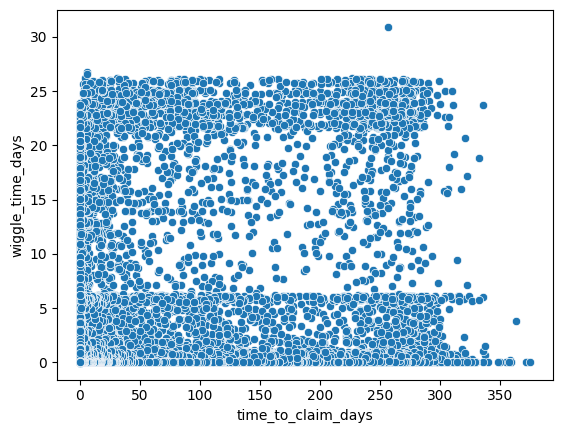

In [250]:
sns.scatterplot(data, x='time_to_claim_days', y='wiggle_time_days')

In [258]:
data[data['is_same_day_ride']==1][['trip_id','boost_ind']].drop_duplicates().groupby('boost_ind').count()

,trip_id
boost_ind,
0,127
1,374


In [259]:
data[data['is_same_day_ride']==0][['trip_id','boost_ind']].drop_duplicates().groupby('boost_ind').count()

,trip_id
boost_ind,
0,9873
1,7126


In [253]:
data[data['boost_ind']==0].head()

,trip_id,cumulative_boost_amount_cents,boost_timestamp,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,trip_state,created_at,claimed_at,scheduled_starts_at,scheduled_ends_at,unclaimed_at,trip_completed_at,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,origin_metro_area_name,commute_minutes,commute_distance,is_same_day_ride,trip_starts_during_peak_hours,ever_unclaimed,time_unclaimed_b4_start,base_cost,final_boost_dollars,time_unclaimed_hours,time_to_claim,boost_hour,time_to_claim_days,pct_boost_cost,boost_day,boost_day_weekday,wiggle_time,wiggle_time_days
0,43,0.0,NaT,0,0,0,0.0,complete,2023-06-01 17:20:28,2024-04-29 02:39:17,2024-05-17 22:25:00,2024-05-17 23:34:26,NaT,2024-05-17 23:30:55,48.60,24.88,24.88,34.43,Orlando Metro,35.78,4.88,False,True,0,NaT,34.43,0.0,NaN,332 days 09:18:49,<NA>,332.388067,0.0,NaN,NaN,18 days 19:45:43,18.823414
4,72,0.0,NaT,0,0,0,0.0,complete,2023-06-05 15:37:43,2024-05-28 17:37:30,2024-05-28 21:45:00,2024-05-28 22:29:17,2024-05-28 07:46:48,2024-05-28 22:29:06,31.00,19.40,19.40,32.83,Greensboro Metro,32.41,20.50,False,True,1,0 days 13:58:12,32.83,0.0,13.97,358 days 01:59:47,<NA>,358.083183,0.0,NaN,NaN,0 days 04:07:30,0.171875
8,173,0.0,NaT,0,0,0,0.0,complete,2023-06-22 14:35:43,2024-04-07 21:25:34,2024-05-03 14:42:38,2024-05-03 14:55:00,NaT,2024-05-03 15:00:59,8.66,0.74,0.74,11.90,Worcester Metro,5.49,2.31,False,True,0,NaT,11.90,0.0,NaN,290 days 06:49:51,<NA>,290.284618,0.0,NaN,NaN,25 days 17:17:04,25.720185
9,196,0.0,NaT,0,0,0,0.0,complete,2023-06-22 14:39:07,2024-04-21 21:28:33,2024-05-16 21:50:00,2024-05-16 22:03:44,NaT,2024-05-16 22:06:48,9.61,0.72,0.71,11.90,Worcester Metro,9.28,3.15,False,True,0,NaT,11.90,0.0,NaN,304 days 06:49:26,<NA>,304.284329,0.0,NaN,NaN,25 days 00:21:27,25.014896
11,223,0.0,NaT,0,0,0,0.0,complete,2023-06-27 14:36:57,2024-05-29 18:46:18,2024-05-30 11:37:31,2024-05-30 12:20:00,NaT,2024-05-30 12:20:52,29.74,13.28,13.29,23.62,Hampton Roads,6.63,0.99,False,True,0,NaT,23.62,0.0,NaN,337 days 04:09:21,<NA>,337.173160,0.0,NaN,NaN,0 days 16:51:13,0.702234


<Axes: >

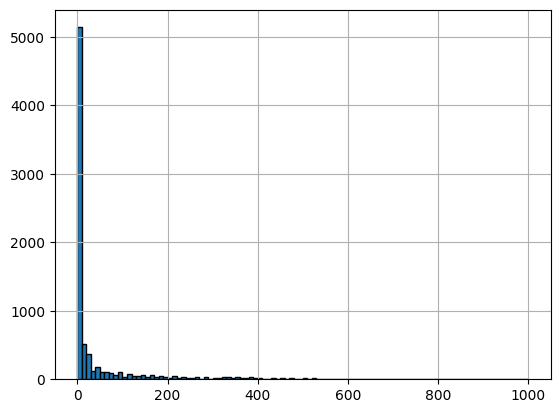

In [66]:
temp = data.groupby(['trip_id'])['time_unclaimed_hours'].mean().reset_index()
temp['time_unclaimed_hours'].hist(bins=100, range=(0, 1000), edgecolor='black')

<Axes: >

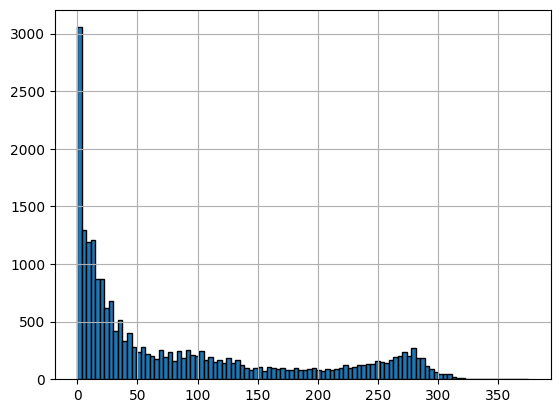

In [75]:
data['time_to_claim_hours'].hist(bins=100, edgecolor='black')

<Axes: xlabel='boost_ind', ylabel='time_to_claim_days'>

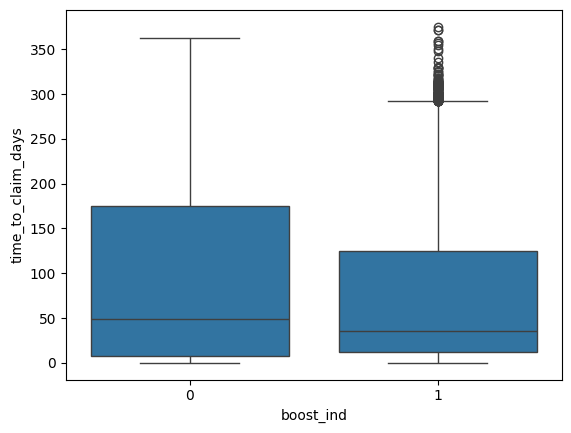

In [106]:
# do boosted claims get claimed later? no actually unboosted get claimed later...
temp = data.groupby(['trip_id','boost_ind',])['time_to_claim_days'].mean().reset_index()
sns.boxplot(x='boost_ind', y='time_to_claim_days', data=temp)

In [133]:
data.columns

Index(['trip_id', 'cumulative_boost_amount_cents', 'boost_timestamp', 'manual_boost', 'boost_ind', 'seq_boost_count', 'single_boost_amount_cents', 'trip_state', 'created_at', 'claimed_at', 'scheduled_starts_at', 'scheduled_ends_at', 'unclaimed_at', 'trip_completed_at', 'total_predicted_duration_mins', 'total_predicted_distance_miles', 'total_predicted_distance_miles_for_fare', 'dollars_paid_to_driver', 'origin_metro_area_name', 'commute_minutes', 'commute_distance', 'is_same_day_ride', 'trip_starts_during_peak_hours', 'ever_unclaimed', 'time_unclaimed_b4_start', 'base_cost', 'final_boost_dollars', 'time_unclaimed_hours', 'time_to_claim', 'boost_hour', 'time_to_claim_days', 'pct_boost_cost'], dtype='object')

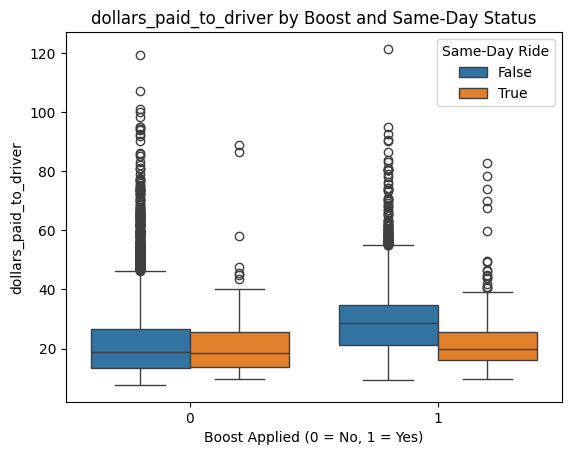

In [136]:
# we do pay more for drivers when we boost 
temp = data.groupby(['trip_id','boost_ind','is_same_day_ride'])['dollars_paid_to_driver'].mean().reset_index()

sns.boxplot(x='boost_ind', y='dollars_paid_to_driver', hue='is_same_day_ride', data=temp)
plt.title("dollars_paid_to_driver by Boost and Same-Day Status")
plt.xlabel("Boost Applied (0 = No, 1 = Yes)")
plt.ylabel("dollars_paid_to_driver")
plt.legend(title='Same-Day Ride')
plt.show()

In [132]:
temp.groupby(['boost_ind','is_same_day_ride']).mean()

trip_id  time_to_claim_days
boost_ind is_same_day_ride                                   
0         False             189413.596273           95.071996
          True              292749.440945            0.027606
1         False             208860.847039           84.812108
          True              305518.280749            0.023107

<Axes: xlabel='manual_boost', ylabel='time_to_claim_days'>

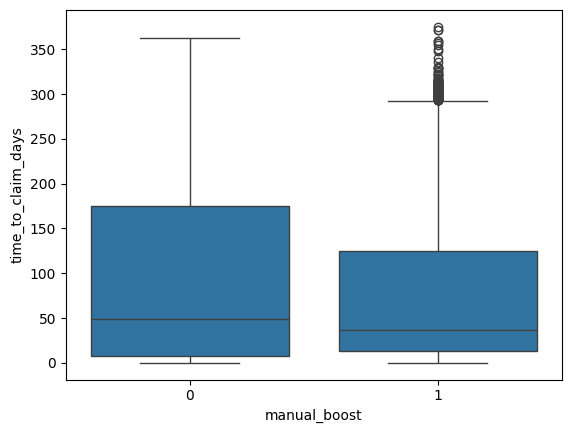

In [111]:
temp = data.groupby(['trip_id','manual_boost',])['time_to_claim_days'].mean().reset_index()
sns.boxplot(x='manual_boost', y='time_to_claim_days', data=temp)

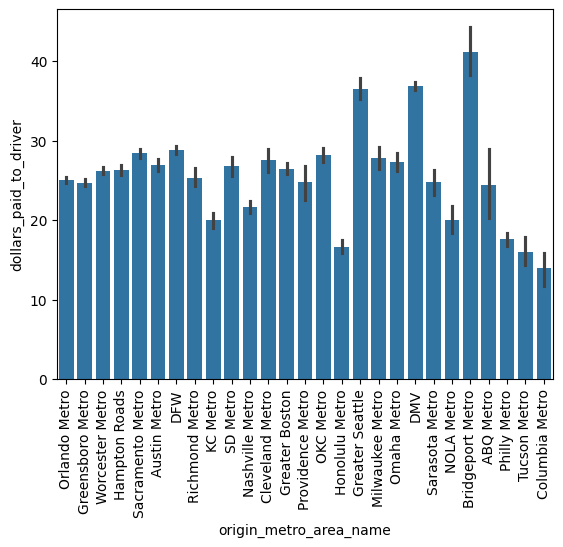

In [120]:
sns.barplot(x='origin_metro_area_name', y='dollars_paid_to_driver', data=data)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90);

<Axes: xlabel='boost_day', ylabel='boost_hour'>

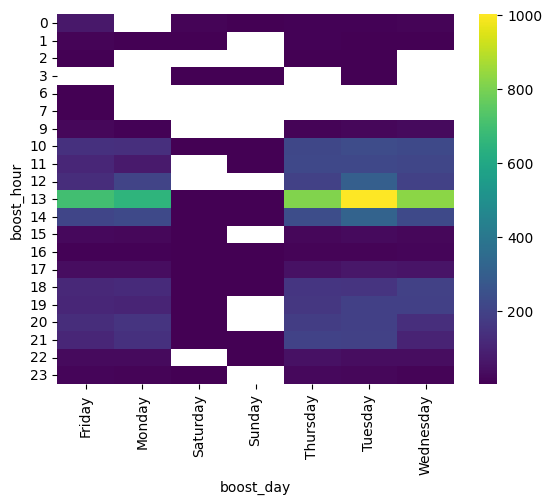

In [147]:
pivot = data.pivot_table(index='boost_hour', columns='boost_day', values='trip_id', aggfunc='count')
sns.heatmap(pivot, cmap='viridis')



In [149]:
data[data.trip_id==283316]

,trip_id,cumulative_boost_amount_cents,boost_timestamp,manual_boost,boost_ind,seq_boost_count,single_boost_amount_cents,trip_state,created_at,claimed_at,scheduled_starts_at,scheduled_ends_at,unclaimed_at,trip_completed_at,total_predicted_duration_mins,total_predicted_distance_miles,total_predicted_distance_miles_for_fare,dollars_paid_to_driver,origin_metro_area_name,commute_minutes,commute_distance,is_same_day_ride,trip_starts_during_peak_hours,ever_unclaimed,time_unclaimed_b4_start,base_cost,final_boost_dollars,time_unclaimed_hours,time_to_claim,boost_hour,time_to_claim_days,pct_boost_cost,boost_day,boost_day_weekday
15798,283316,1022.0,2024-07-17 11:16:07,1,1,1,1022.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104,Wednesday,2.0
15799,283316,1162.0,2024-07-17 11:26:06,1,1,2,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104,Wednesday,2.0
15800,283316,1302.0,2024-07-17 11:36:09,1,1,3,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104,Wednesday,2.0
15801,283316,1442.0,2024-07-17 11:54:07,1,1,4,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,11,43.831863,0.636104,Wednesday,2.0
15802,283316,1582.0,2024-07-17 12:04:10,1,1,5,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104,Wednesday,2.0
15803,283316,1722.0,2024-07-17 12:28:06,1,1,6,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104,Wednesday,2.0
15804,283316,2562.0,2024-07-17 12:50:05,1,1,7,840.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104,Wednesday,2.0
15805,283316,2702.0,2024-07-17 12:58:06,1,1,8,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,12,43.831863,0.636104,Wednesday,2.0
15806,283316,2842.0,2024-07-17 13:18:06,1,1,9,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,13,43.831863,0.636104,Wednesday,2.0
15807,283316,2982.0,2024-07-17 13:28:06,1,1,10,140.0,complete,2024-06-03 18:09:56,2024-07-17 14:07:49,2024-07-17 14:50:00,2024-07-17 15:28:40,2024-07-16 22:03:04,2024-07-17 15:21:44,27.07,13.83,15.27,49.08,Milwaukee Metro,6.01,4.5,False,False,1,0 days 16:46:56,17.86,31.22,16.782222,43 days 19:57:53,13,43.831863,0.636104,Wednesday,2.0


In [192]:
data.columns

Index(['trip_id', 'cumulative_boost_amount_cents', 'boost_timestamp', 'manual_boost', 'boost_ind', 'seq_boost_count', 'single_boost_amount_cents', 'trip_state', 'created_at', 'claimed_at', 'scheduled_starts_at', 'scheduled_ends_at', 'unclaimed_at', 'trip_completed_at', 'total_predicted_duration_mins', 'total_predicted_distance_miles', 'total_predicted_distance_miles_for_fare', 'dollars_paid_to_driver', 'origin_metro_area_name', 'commute_minutes', 'commute_distance', 'is_same_day_ride', 'trip_starts_during_peak_hours', 'ever_unclaimed', 'time_unclaimed_b4_start', 'base_cost', 'final_boost_dollars', 'time_unclaimed_hours', 'time_to_claim', 'boost_hour', 'time_to_claim_days', 'pct_boost_cost', 'boost_day', 'boost_day_weekday'], dtype='object')

In [240]:
## how effective is boosting? create some regression plots 
# compute the time between first boost and last boost required to get ride claimed
# compute the # of boosts required to get ride claimed
# Group by trip_id and calculate first and last boost times
boost_times = data[(data['boost_ind']==1) 
                   & (data['cumulative_boost_amount_cents']>0)].groupby('trip_id')['boost_timestamp'].agg(['min', 'max','count']).reset_index()
boost_times['boost_duration'] = boost_times['max'] - boost_times['min']
boost_times['boost_duration_hours'] = boost_times['boost_duration'].dt.total_seconds() / 3600
# compute the time between first boost and claimed_at, how long did the boosted ride take to get claimed? 
claimed_times = data[['trip_id', 'claimed_at','unclaimed_at','scheduled_starts_at','dollars_paid_to_driver','base_cost','final_boost_dollars','pct_boost_cost']].drop_duplicates()
boost_times = pd.merge(boost_times, claimed_times, on='trip_id')
boost_times['unclaimed_at_hours'] = boost_times['scheduled_starts_at'] - boost_times['unclaimed_at']
boost_times['unclaimed_at_hours'] = boost_times['unclaimed_at_hours'].dt.total_seconds() / 3600
# Define the bin edges (e.g., from 0 to 120 hours, in 12-hour intervals)
bins = [0, 6, 12, 24, 48]
labels = ["0-6 hrs","6-12 hrs", "12-24 hrs", "24-48 hrs"]
boost_times['claim_time_bin'] = pd.cut(boost_times['unclaimed_at_hours'], bins=bins, labels=labels, right=False)

# Create the binned column
boost_times['time_from_first_boost_to_claim'] = boost_times['claimed_at'] - boost_times['min']
boost_times['time_from_first_boost_to_claim_hours'] = boost_times['time_from_first_boost_to_claim'].dt.total_seconds() / 3600
boost_times_df = boost_times[['trip_id','count','boost_duration_hours','time_from_first_boost_to_claim_hours','unclaimed_at_hours','claim_time_bin','dollars_paid_to_driver','base_cost','final_boost_dollars','pct_boost_cost']]
boost_times_df.columns = ['trip_id','no_boosts','boost_duration_hours','time_from_first_boost_to_claim_hours','unclaimed_at_hours','claim_time_bin','dollars_paid_to_driver','base_cost','final_boost_dollars','pct_boost_cost']
# marginal benefit/cost of each additional boost
boost_times_df['time_per_boost'] = boost_times_df['time_from_first_boost_to_claim_hours'] / boost_times_df['no_boosts']



/var/folders/n7/pr4xbjnx1675ly58yn91qcsh0000gn/T/ipykernel_56576/862493770.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boost_times_df['time_per_boost'] = boost_times_df['time_from_first_boost_to_claim_hours'] / boost_times_df['no_boosts']


In [172]:
data.columns

Index(['trip_id', 'cumulative_boost_amount_cents', 'boost_timestamp', 'manual_boost', 'boost_ind', 'seq_boost_count', 'single_boost_amount_cents', 'trip_state', 'created_at', 'claimed_at', 'scheduled_starts_at', 'scheduled_ends_at', 'unclaimed_at', 'trip_completed_at', 'total_predicted_duration_mins', 'total_predicted_distance_miles', 'total_predicted_distance_miles_for_fare', 'dollars_paid_to_driver', 'origin_metro_area_name', 'commute_minutes', 'commute_distance', 'is_same_day_ride', 'trip_starts_during_peak_hours', 'ever_unclaimed', 'time_unclaimed_b4_start', 'base_cost', 'final_boost_dollars', 'time_unclaimed_hours', 'time_to_claim', 'boost_hour', 'time_to_claim_days', 'pct_boost_cost', 'boost_day', 'boost_day_weekday'], dtype='object')

In [187]:
boost_times_df['no_boosts'].value_counts()

no_boosts
1     4715
2     1555
3      929
4      196
5       60
6       12
7        3
11       1
Name: count, dtype: int64

In [190]:
boost_times_df.corr()

,trip_id,no_boosts,boost_duration_hours,time_from_first_boost_to_claim_hours,dollars_paid_to_driver,base_cost,final_boost_dollars
trip_id,1.000000,0.017515,0.067133,0.113225,-0.313887,0.004491,-0.366603
no_boosts,0.017515,1.000000,0.847270,0.718597,0.456138,-0.065372,0.581556
boost_duration_hours,0.067133,0.847270,1.000000,0.836902,0.379772,-0.028744,0.462888
time_from_first_boost_to_claim_hours,0.113225,0.718597,0.836902,1.000000,0.355145,0.094997,0.331777
dollars_paid_to_driver,-0.313887,0.456138,0.379772,0.355145,1.000000,0.534209,0.712961
base_cost,0.004491,-0.065372,-0.028744,0.094997,0.534209,1.000000,-0.211894
final_boost_dollars,-0.366603,0.581556,0.462888,0.331777,0.712961,-0.211894,1.000000


<Axes: xlabel='no_boosts', ylabel='time_from_first_boost_to_claim_hours'>

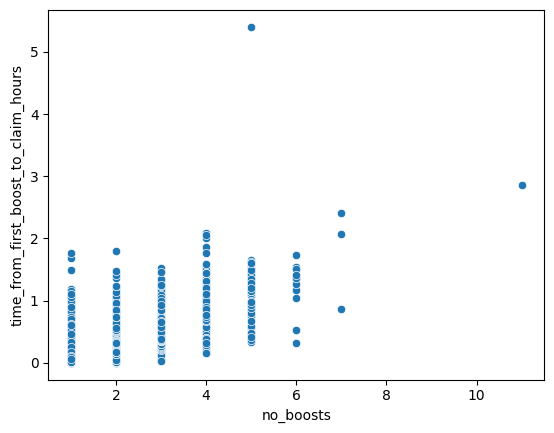

In [196]:
sns.scatterplot(boost_times_df, x='no_boosts', y='time_from_first_boost_to_claim_hours')

<Axes: xlabel='final_boost_dollars', ylabel='time_from_first_boost_to_claim_hours'>

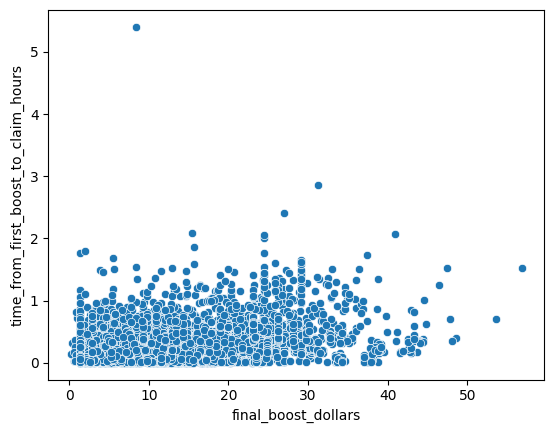

In [189]:
sns.scatterplot(boost_times_df, x='final_boost_dollars', y='time_from_first_boost_to_claim_hours')

<Axes: xlabel='pct_boost_cost', ylabel='time_from_first_boost_to_claim_hours'>

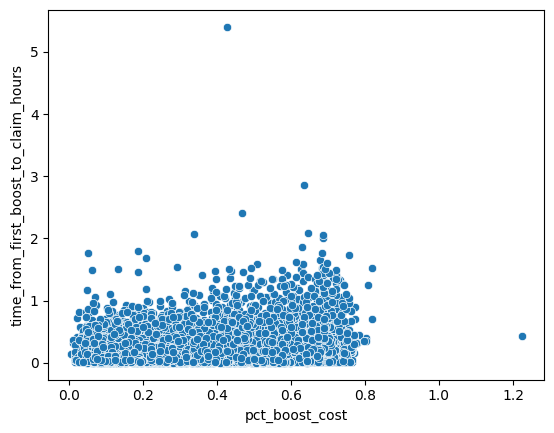

In [195]:
sns.scatterplot(boost_times_df, x='pct_boost_cost', y='time_from_first_boost_to_claim_hours')

<Axes: >

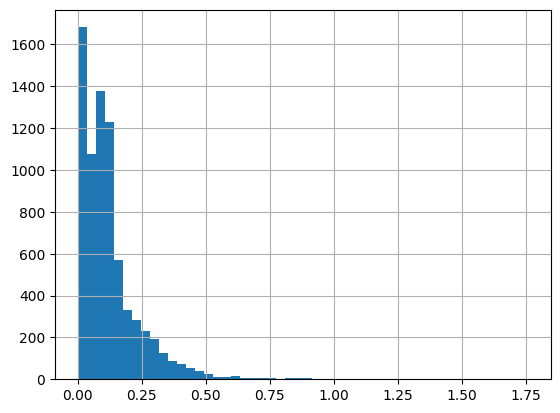

In [209]:
boost_times_df['time_per_boost'].hist(bins=50)